In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Load the data
df = pd.read_csv('Financials.csv')

# Clean column names (remove leading and trailing whitespaces)
df.columns = df.columns.str.strip()

In [16]:
# Define financial columns to clean
financial_columns = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

# Clean financial columns by removing dollar signs, commas, and stripping spaces
for col in financial_columns:
    df[col] = df[col].str.replace('$', '')  # Remove dollar signs
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = df[col].str.strip()           # Remove leading and trailing spaces
    df[col] = df[col].replace('-', '0')     # Replace dashes with zeros

# Handle parentheses in the Profit column to indicate negative values
df['Profit'] = df['Profit'].str.replace(r'\((.*)\)', r'-\1', regex=True)

# Convert financial columns to float
df[financial_columns] = df[financial_columns].astype(float)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [17]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.00,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.00,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.00,24700.0,12350.00,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,2014-01-03,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,2014-01-10,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,2014-01-02,2,February,2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,2014-01-04,4,April,2014


In [19]:
# Drop unnecessary columns
df = df.drop(['Month Number', 'Month Name', 'Year'], axis=1)

In [20]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

In [21]:
# Group by Country and aggregate data
group = df.groupby('Country').agg({'Sales': 'sum', 'Profit': 'sum', 'Units Sold': 'sum', 'COGS': 'sum'}).reset_index()


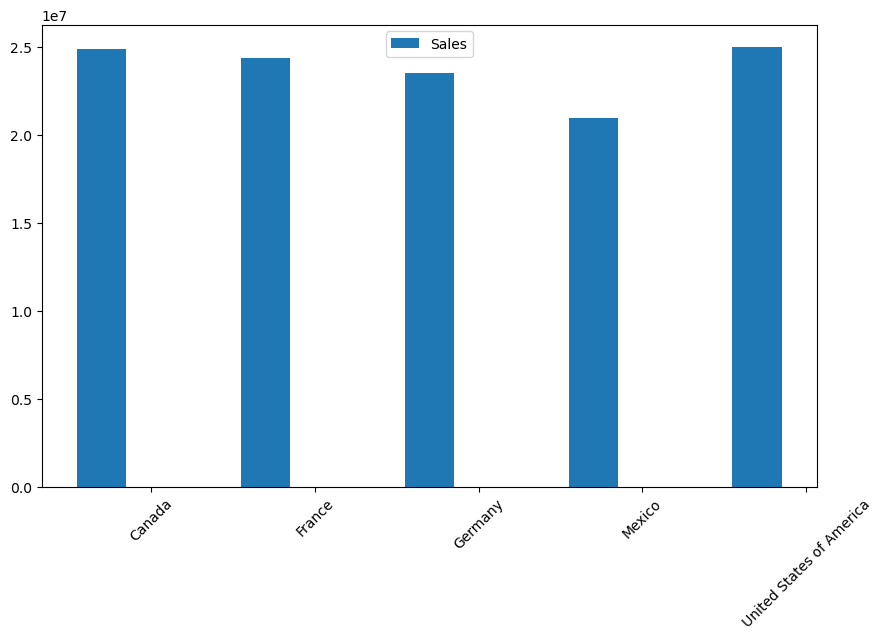

In [22]:
# Plot Sales by Country
bar_width = 0.3
plt.figure(figsize=(10, 6))
x = np.arange(len(group['Country']))
plt.bar(x - bar_width, group['Sales'], bar_width, label='Sales')
plt.xticks(x, group['Country'], rotation=45)
plt.legend()
plt.show()

# We can see that highest sale is noticed in USA and in Canada and lowest sale is recorded in Mexico

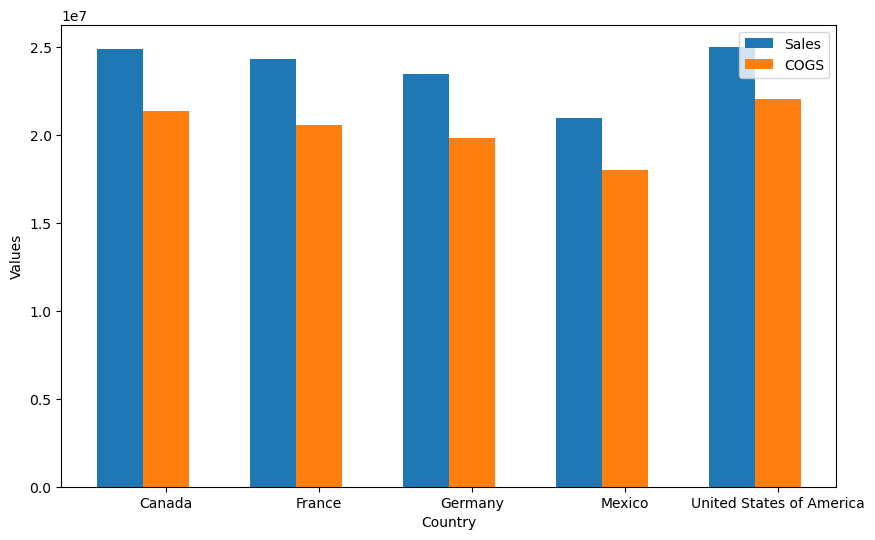

In [30]:
plt.figure(figsize=(10,6))
x = np.arange(len(group['Country']))
plt.bar(x-bar_width, group['Sales'], bar_width, label='Sales')
plt.bar(x, group['COGS'], bar_width, label='COGS')
# plt.bar(x+bar_width, group['Units Sold'], bar_width, label='Units Sold')

plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(x, group['Country'])
plt.legend()
plt.show()

# We can see that Sales is more than the COGS(Cost of Gross Sale) it means company is in profit

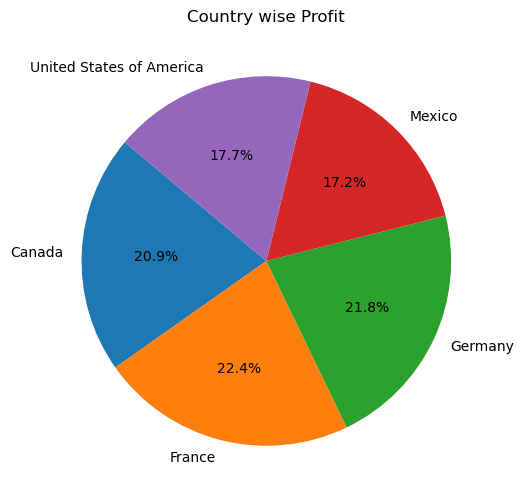

In [31]:
plt.figure(figsize=(10,6))

plt.pie(group['Profit'], labels=group['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country wise Profit')
plt.show()

# Product wise analysis

In [32]:
group_product=df.groupby('Product').agg({'Units Sold':'sum', 'Manufacturing Price':'mean', 'Sale Price':'mean', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

In [33]:
# we can create one more column which contain margin that is selling price minus manufacturing price
group_product['Gross Margin']=group_product['Sale Price']-group_product['Manufacturing Price']

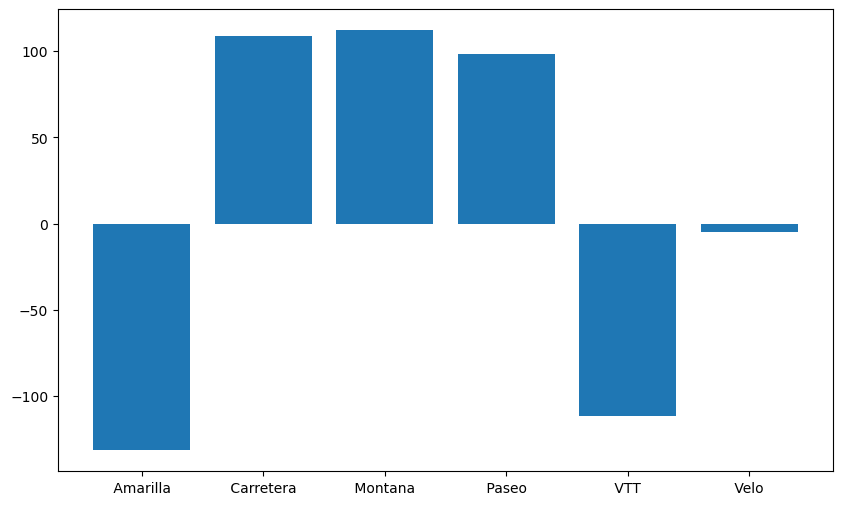

In [34]:
plt.figure(figsize=(10,6))

categories=group_product['Product']
margin_values=group_product['Gross Margin']
# Create a bar chart
plt.bar(categories, margin_values, label='Gross Margin')
plt.xticks(group_product['Product'])

plt.show()


# From above figure we can see that Product 'Amarilla' and product 'VTT' has negative gross margin and product 'Velo' has very low margin

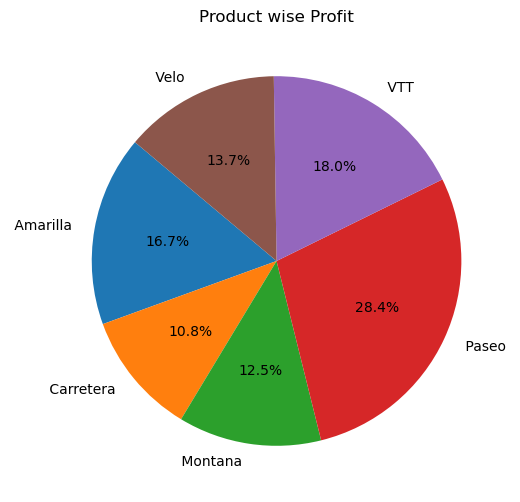

In [36]:
plt.figure(figsize=(10,6))

plt.pie(group_product['Profit'], labels=group_product['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Product wise Profit')
plt.show()

# From here we can see that Paseo has highest profit and Montana have low profit

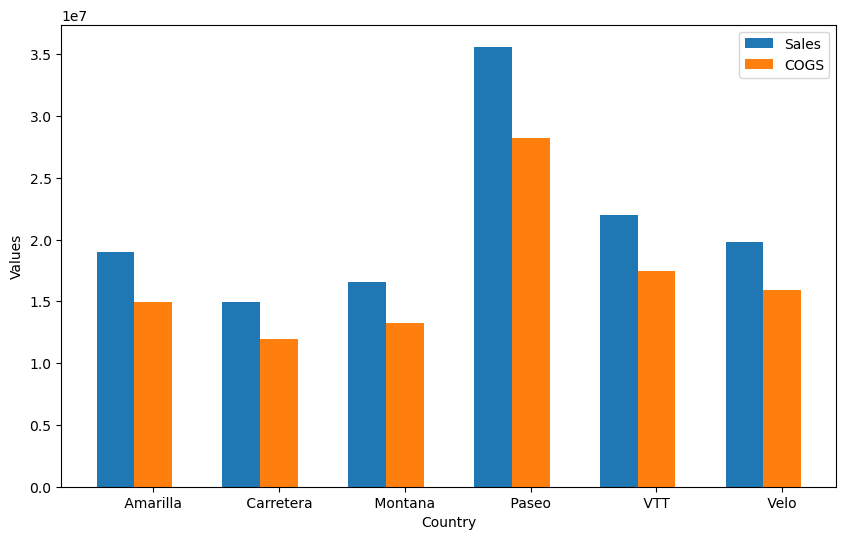

In [38]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width, group_product['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_product['COGS'], bar_width, label='COGS')
# plt.bar(x+bar_width, group['Units Sold'], bar_width, label='Units Sold')

plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(x, group_product['Product'])
plt.legend()
plt.show()

# Sales of Paseo is much more than other Products and Carretera has the low sales

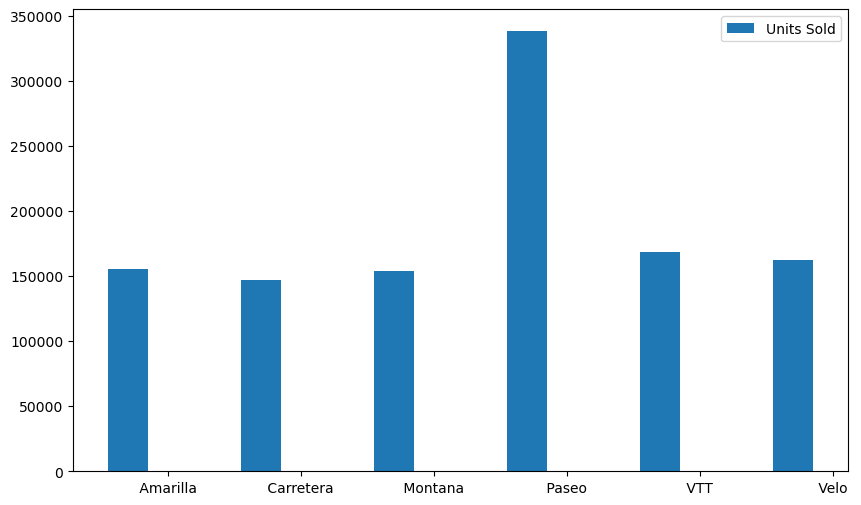

In [39]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width, group_product['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x, group_product['Product'])
plt.legend()
plt.show()

From here we can clearly see that Paseo is the product which sells maximum

# Sector wise analysis¶

In [44]:
group_segment=df.groupby('Segment').agg({'Units Sold':'sum', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

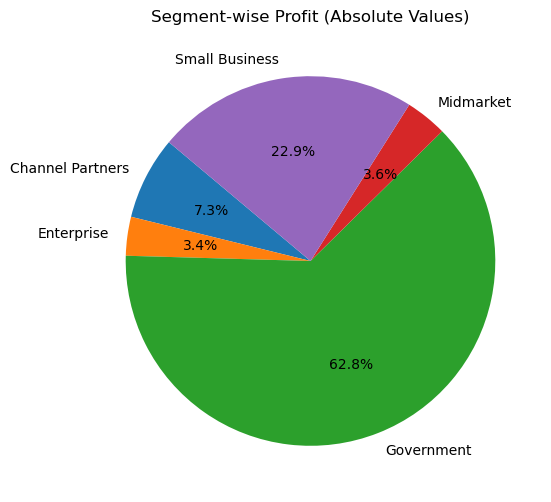

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and already loaded

# Group data by Segment
group_segment = df.groupby('Segment').agg({'Units Sold': 'sum', 'Gross Sales': 'sum', 'Profit': 'sum', 'COGS': 'sum'}).reset_index()

# Use absolute values for the pie chart
plt.figure(figsize=(10, 6))
plt.pie(group_segment['Profit'].abs(), labels=group_segment['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Segment-wise Profit (Absolute Values)')
plt.show()


Goverment segment gives most profit and Midmarket gives least profit

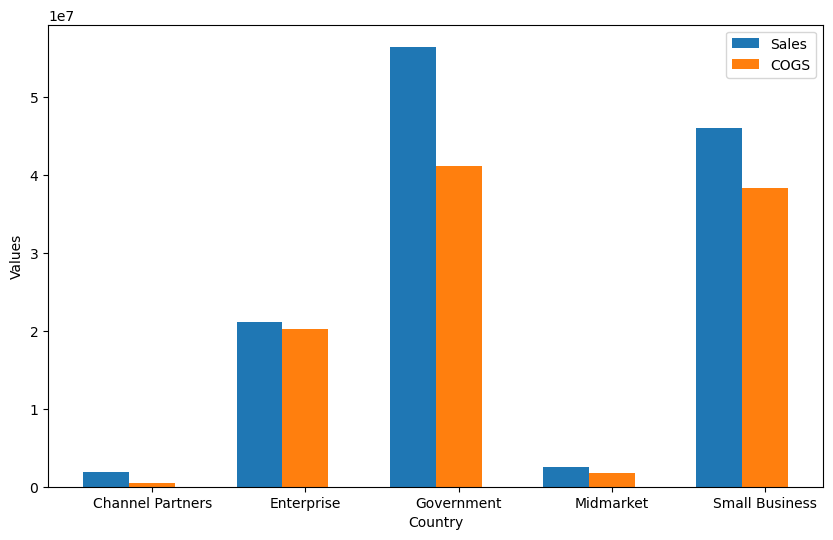

In [48]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_segment['COGS'], bar_width, label='COGS')
# plt.bar(x+bar_width, group['Units Sold'], bar_width, label='Units Sold')

plt.xlabel('Country')
plt.ylabel('Values')
plt.xticks(x, group_segment['Segment'])
plt.legend()
plt.show()

In the Enterprise sector cost of sales and sales is almost same so we can say that margin in that sector could be low and in goverment sector difference between Sales and COGS is more means this sector has more margin¶

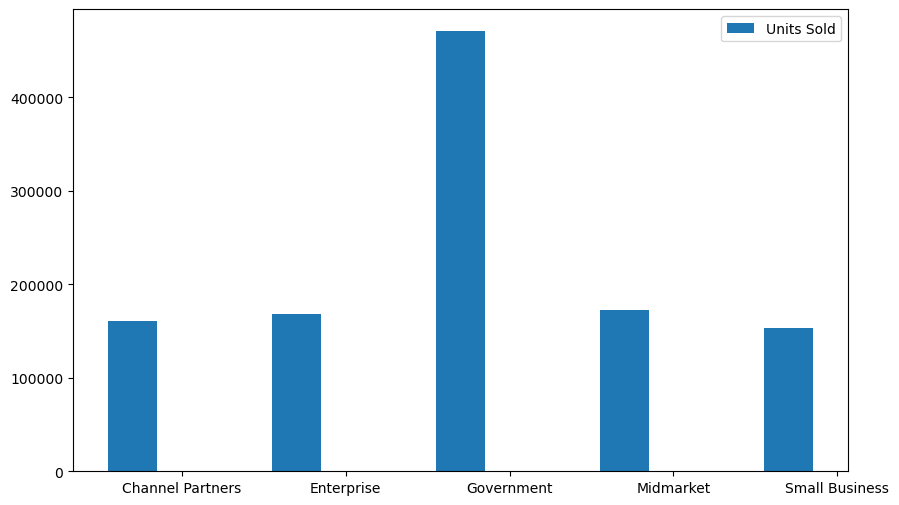

In [49]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

In [23]:
# Time series analysis: Resampling for monthly, quarterly, and yearly data
df.set_index('Date', inplace=True)


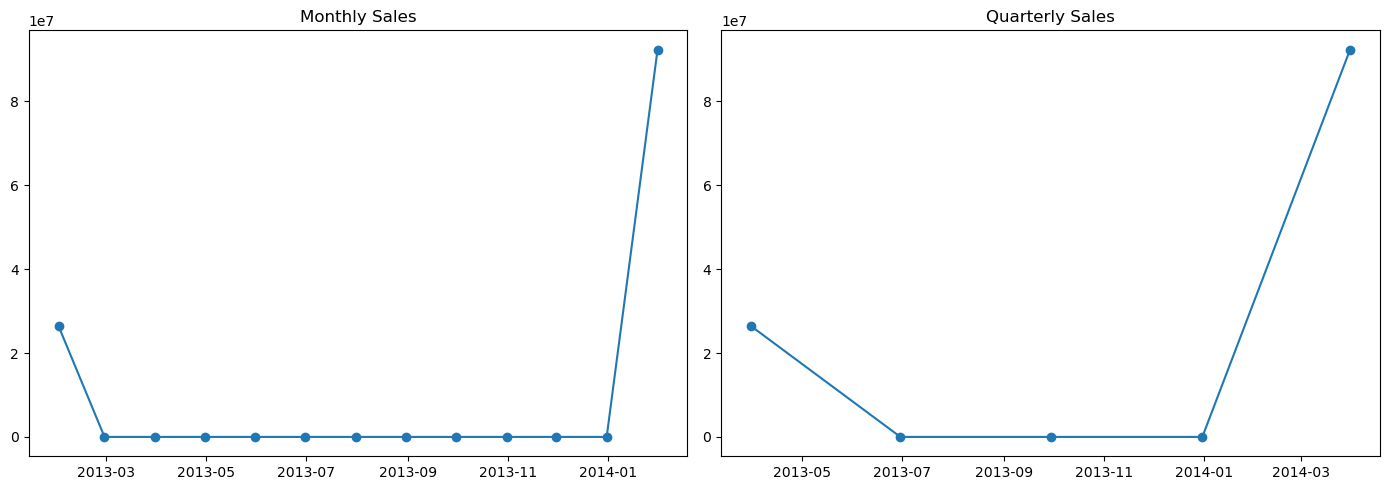

In [24]:
# Monthly and Quarterly Sales
monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales')

plt.subplot(1, 2, 2)
plt.plot(quarterly_sales, marker='o')
plt.title('Quarterly Sales')

plt.tight_layout()
plt.show()

In [50]:
Yearly_profit = df['Profit'].resample('Y').sum()

In [51]:
Yearly_profit=Yearly_profit.reset_index()
Yearly_profit

,Date,Profit
0,2013-12-31,3878464.51
1,2014-12-31,13015237.78


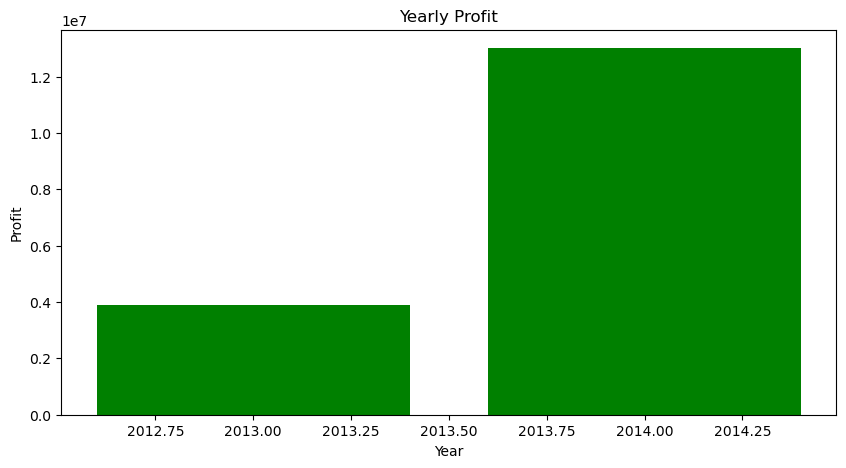

In [52]:
# Yearly Profit
yearly_profit = df['Profit'].resample('Y').sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(yearly_profit['Date'].dt.year, yearly_profit['Profit'], color='Green')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly Profit')
plt.show()